# Lecture 6: Priors on function spaces. Gaussian Process regression. The Karhunen-Loeve expansion

### Problem setting
* We have an unknown multivariate function $f(\mathbf{x})$ that we would like to approximate on some specified domain.<br> 
* We have a dataset $\mathcal{D}$ of $n$ function observations, $\mathcal{D} = {(\mathbf{x}_i,y_i),i = 1,\ldots,n}$.
* Given $\mathcal{D}$ we wish to make predictions for new inputs $\mathbf{x}_*$ within the domain.

* **To solve this problem we must make assumptions about the characteristics of $f(\mathbf{x})$**.

### Two common approaches

* restrict the class of functions that we consider (e.g. considering only linear functions)
    * **Problem**: we have to decide upon the richness of the class of functions considered; $f(\mathbf{x})$ can be not well modelled by this class, so the predictions will be poor.

* the second approach is (*speaking rather loosely*) to give a prior probability to every possible function, where higher probabilities are given to functions that we consider to be more likely.
    * <span style="color:red">**Problem**: there are an uncountably infinite set of possible functions.</span>


### Second approach 
#### This is where the Gaussian process (GP) arise to cope with the problem mentioned above

Typically, there is some knowledge about a function of interest $f(\mathbf{x})$ even before observing it anywhere.

For example, $f(\mathbf{x})$ cannot exceed, or be smaller than, certain values or that it is periodic or that it shows translational invariance.<br>
Such knowledge is called as the **prior knowledge**.

**Prior knowledge** may be precise (e.g., $f(\mathbf{x})$ is twice differentiable), or it may be vague (e.g., the probability that the periodicity is $T$ is $p(T)$). When we have a deal with vague prior knowledge, we refer to it as **prior belief**. 

**Prior beliefs** about $f(\mathbf{x})$ can be modeled by a probability measure on the space of functions from $\mathcal{F}$ to $\mathbb{R}$. A GP is a great way to represent this probability measure.

### Definition of GP
**A Gaussian process is a collection of random variables, any finite number of which have a joint Gaussian distribution (in other words GP is a generalization of a multivariate Gaussian distribution to infinite dimensions).** 

A GP defines a probability measure on $\mathcal{F}$. When we say that $f(\mathbf{x})$ is a GP, we mean that it is a random variable that is actually a function. 

Analytically, it can be written as
$$
f(\mathbf{x}) \sim \mbox{GP}\left(m(\mathbf{x}), k(\mathbf{x},\mathbf{x'}) \right),
$$ where  
* $m:\mathbb{R}^d \rightarrow \mathbb{R}$ is the mean function; 
* $k:\mathbb{R}^d \times \mathbb{R}^d \rightarrow \mathbb{R}$ is the covariance function.

### Connection to the multivariate Gaussian distribution

Let $\mathbf{x}_{1:n}=\{\mathbf{x}_1,\dots,\mathbf{x}_n\}$ be $n$ points in $\mathbb{R}^d$. Let $\mathbf{f}\in\mathbb{R}^n$ be the outputs of $f(\mathbf{x})$ on each one of the elements of $\mathbf{x}_{1:n}$,
$$
\mathbf{f} =
\left(
\begin{array}{c}
f(\mathbf{x}_1)\\
\vdots\\
f(\mathbf{x}_n)
\end{array}
\right).
$$
The fact that $f(\mathbf{x})$ is a GP with mean and covariance function $m(\mathbf{x})$ and $k(\mathbf{x},\mathbf{x'})$ means that the vector of outputs $\mathbf{f}$ at the arbitrary inputs is the following multivariate-normal: $$
\mathbf{f} \sim \mathcal{N}\bigl(\mathbf{m}(\mathbf{x}_{1:n}), \mathbf{K}(\mathbf{x}_{1:n}, \mathbf{x}_{1:n})\bigr),
$$ with mean vector: $$
\mathbf{m}(\mathbf{x}_{1:n}) =
\left(
\begin{array}{c}
m(\mathbf{x}_1)\\
\vdots\\
m(\mathbf{x}_n)
\end{array}
\right),
$$ and covariance matrix: $$
\mathbf{K}(\mathbf{x}_{1:n},\mathbf{x}_{1:n}) = \left(
\begin{array}{ccc}
k(\mathbf{x}_1,\mathbf{x}_1) & \dots &k(\mathbf{x}_1, \mathbf{x}_n)\\
\vdots& \ddots& \vdots\\
k(\mathbf{x}_n, \mathbf{x}_1)&  \dots &k(\mathbf{x}_n, \mathbf{x}_n)
\end{array}
\right).
$$

Now, since we have defined a GP, let us talk about how do we encode our **prior beliefs** into a GP. 

We do so through the **mean** and **covariance functions**.

### Interpretation of the mean function
For any point $\mathbf{x}\in\mathbb{R}^d$, $m(\mathbf{x})$ is the expected value of the r.v. $f(\mathbf{x})$:
$$
m(\mathbf{x}) = \mathbb{E}[f(\mathbf{x})].
$$
The mean function can be any arbitrary function. Essentially, it tracks generic trends in the response as the input is varied.<br> 
In practice, we try and make a suitable choice for the mean function that is easy to work with. Such choices include:
* a constant, $m(\mathbf{x}) = c,$ where $c$ is a parameter (in many cases $c=0$).
* linear, $m(\mathbf{x}) = c_0 + \sum_{i=1}^dc_ix_i,$ where $c_i, i=0,\dots,d$ are parameters.
* using a set of $m$ basis functions (generalized linear model), $m(\mathbf{x}) = \sum_{i=1}^mc_i\phi_i(\mathbf{x})$, where $c_i$ and $\phi_i(\cdot)$ are parameters and basis functions.
* generalized polynomial chaos (gPC), using a set of $d$ polynomial basis functions upto a given degree $\rho$, $m(\mathbf{x}) = \sum_{i=1}^{d}c_i\phi_i(\mathbf{x})$ where the basis functions $\phi_i$ are mutually orthonormal: $$
\int \phi_{i}(\mathbf{x}) \phi_{j}(\mathbf{x}) dF(\mathbf{x}) = \delta_{ij}.
$$

### Interpretation of the covariance function
Let $\mathbf{x}\in\mathbb{R}^d$. Then $k(\mathbf{x}, \mathbf{x})$ is the variance of the random variable $f(\mathbf{x})$, i.e., $$
k(\mathbf{x},\mathbf{x}) = \mathbb{V}[f(\mathbf{x})] = \mathbb{E}\left[\left(f(\mathbf{x}) - m(\mathbf{x}) \right)^2 \right].
$$ In other words, we believe that there is about $95\%$ probability that the value of the r.v. $f(\mathbf{x})$ fall within the interval: $$
\left(m(\mathbf{x}) - 2\sqrt{k(\mathbf{x}, \mathbf{x})}, m(\mathbf{x}) + 2\sqrt{k(\mathbf{x},\mathbf{x})}\right).
$$

### Interpretation of the covariance function
Let $\mathbf{x},\mathbf{x'} \in \mathbb{R}^d$. Then $k(\mathbf{x}, \mathbf{x}')$ tells us how the r.v. $f(\mathbf{x})$ and $f(\mathbf{x}')$ are correlated. 

In particular, $k(\mathbf{x},\mathbf{x}')$ is equal to the covariance of the r.v. $f(\mathbf{x})$ and $f(\mathbf{x}')$, i.e., $$
k(\mathbf{x}, \mathbf{x}') = \mathbb{E}\left[
\bigl(f(\mathbf{x}) - m(\mathbf{x})\bigr)
\bigl(f(\mathbf{x}') - m(\mathbf{x}')\bigr)
\right].
$$
Essentially, a covariance function (or **covariance kernel**) defines a similarity measure on the input space. 

## Properties of the covariance function
* For any $\mathbf{x}\in\mathbb{R}^d$, $k(\mathbf{x}, \mathbf{x})\geqslant0$. This is easly understood by the interpretation of $k(\mathbf{x}, \mathbf{x})$ as the variance of the random variable $f(\mathbf{x})$.
* For any choice of points $\mathbf{X}\in\mathbb{R}^{n\times d}$, the covariance matrix: $\mathbf{K}(\mathbf{X}, \mathbf{X})$ has to be positive-semidefinite (so that the vector of outputs $\mathbf{f}$ is indeed a multivariate normal distribution).





### Encoding prior beliefs in the covariance function
* **Modeling regularity**. The choice of the covariance function controls the regularity properties of the functions sampled from the probability induced by the GP. For example, if the covariance kernel chosen is the squared exponential kernel, which is infinitely differentiable, then the functions sampled from the GP will also be infinitely differentiable.
* **Modeling invariance**. If the covariance kernel is invariant w.r.t. a transformation $T$, i.e., $k(\mathbf{x}, T\mathbf{x}')=k(T\mathbf{x}, \mathbf{x}')=k(\mathbf{x}, \mathbf{x}')$ then samples from the GP will be invariant w.r.t. the same transformation.
* Other possibilities include periodicity, additivity etc.


### Squared exponential covariance function
Squared exponential (SE) is widely used covariance function. Its has the form: 
$$
k(\mathbf{x}, \mathbf{x}') = v\exp\left\{-\frac{1}{2}\sum_{i=1}^d\frac{(x_i - x_i')^2}{\ell_i^2}\right\},
$$ 
where 
* $v>0$ – signal strength. The bigger it is, the more the GP $f(\mathbf{x})$ will vary about the mean.
* $\ell_i>0, i=1,\dots,d$ – length-scale of the $i$-th input dimension of the GP. The bigger it is, the smoother the samples of $f(\mathbf{x})$ appear along the $i$-th input dimension.

In [1]:
# 1-D example
from ipywidgets import interactive, interact, widgets
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as SP

# defining Squared Exponential Kernel and plot it

def k(length_scale):
    x = np.arange(0., 5., 0.1)
    plt.figure(figsize=(10, 7))
    plt.ylim([0, 1.05])
    plt.xlabel('$x$', fontsize=16)
    plt.ylabel('$k(x,0)$', fontsize=16)
    plt.plot(x, np.exp(-.5 * x**2/length_scale**2), 'b-')
    plt.show()


controls = {r'length_scale': widgets.FloatSlider(
    min=0.01, max=5.0, step=0.1, value=1., continuous_update=False, description=r'$\ell$')}

In [2]:
interact(k, **controls);           

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='$\\ell$', max=5.0, min=0.01), Output()), _dom_classes=('widget-interact',))

### Properties of the covariance matrix
Let $\mathbf{x}_{1:n}$ be an arbitrary set of input points. The covariance matrix $\mathbf{K}\in\mathbb{R}^{n\times n}$ defined by: $$
\mathbf{K}\equiv\mathbf{K}(\mathbf{x}_{1:n}, \mathbf{x}_{1:n}) = \left(
\begin{array}{ccc}
k(\mathbf{x}_1,\mathbf{x}_1) &\dots& k(\mathbf{x}_1, \mathbf{x}_n)\\
\vdots&\ddots &\vdots\\
k(\mathbf{x}_n, \mathbf{x}_1)&\dots& k(\mathbf{x}_n, \mathbf{x}_n)
\end{array}
\right),
$$ must be positive definite.<br> 
Mathematically, this can be expressed in two equivalent ways:
* For all vectors $\mathbf{v}\in\mathbb{R}^T$, we have: $$
\mathbf{v}^t\mathbf{K}\mathbf{v}\geqslant 0,
$$
* All the eigenvalues of $\mathbf{K}$ are positive.

In [3]:
def plot_eigen(n, length_scale, variance):
    np.random.seed(1)
    X = np.random.rand(n, 1)
    sqdist = np.sum(X**2,1).reshape(-1,1) + np.sum(X**2,1) - 2*np.dot(X, X.T)
    K = variance*np.exp(-.5 * (1/length_scale**2) * sqdist)

    eig_val = np.linalg.eigh(K)[0][::-1] # Sort'em

    # Plot the eigenvalues
    fig, ax = plt.subplots(figsize=(9,7))
    ax.plot(np.arange(1, n+1), eig_val, 'g.', markersize=10)
    ax.set_xlabel('$i$', fontsize=16)
    ax.set_ylabel('$\lambda_i$', fontsize=16)
    plt.show()

controls = {r'n' : widgets.IntSlider(min=1,max=100,step=1,value=40, continuous_update=True,description=r'$N$ of points'),
            r'length_scale' : widgets.FloatSlider(min=0.1,max=1.0,step=0.05,value=0.01, continuous_update=True,description=r'$\ell$'),
            r'variance' : widgets.FloatSlider(min=0.01,max=5.0,step=0.05,value=1., continuous_update=True,description=r'$\nu$')}    

In [4]:
interact(plot_eigen, **controls);    

interactive(children=(IntSlider(value=40, description='$N$ of points', min=1), FloatSlider(value=0.1, description='$\\ell$', max=1.0, min=0.1, step=0.05), FloatSlider(value=1.0, description='$\\nu$', max=5.0, min=0.01, step=0.05), Output()), _dom_classes=('widget-interact',))

### GP sampling

* Take a finite number of inputs: $\mathbf{x}_{1:n}=\{\mathbf{x}_1,\dots,\mathbf{x}_n\}, \mathbf{x}_i\in\mathbb{R}^d$.
Consider the model output on them: $\mathbf{f} = \{f(\mathbf{x}_1),\ldots,f(\mathbf{x}_n)\}, \mathbf{f}\in\mathbb{R}^n$.
* Our *prior belief* is that they are distributed according to: $\mathbf{f}\sim\mathcal{N}(\mathbf{m},\mathbf{K})$. 
* In order to sample from $\mathbf{f}\sim\mathcal{N}(\mathbf{m},\mathbf{K})$:
    * Take the Cholesky decomposition of $\mathbf{K}$: $\mathbf{K} = \mathbf{L}\mathbf{L}^T$.
    * Sample a $n$ independent standard normal variables: $\mathbf{z}\sim\mathcal{N}(\mathbf{0}_n,\mathbf{I}_n)$.
    * Set $\mathbf{f} = \mathbf{m} + \mathbf{L}\mathbf{z}$.
    
One can see that
$$
\mathbb E[\mathbf f]=\mathbf m,
$$
and
$$
\text{Var}[f_i,f_j]=\mathbb E\left[(f_i-m_i)(f_j-m_j)\right]=
\mathbb E\left[\left(\sum_{m=0}^nl_{im}z_m\right)\left(\sum_{r=0}^nl_{jr}z_r\right)\right]=
\mathbb E\left[\sum_{m=0}^nl_{im}z_ml_{jm}z_m\right]=k_{ij},
$$
where $l_{ij}$ and $k_{ij}$ are elements of matrices $\mathbf{L}$ and $\mathbf{K}$.

In [5]:
def GP_sampling(N_samples, length_scale, n_points):
    np.random.seed(1)

    # Define the kernel
    def kernel(a, b):
        sqdist = SP.distance.cdist(a, b, 'sqeuclidean')
        return np.exp(-.5 * sqdist/(length_scale**2))

    # points we're going to make predictions at.
    Xtest = np.linspace(-5, 5, n_points)[:, None]

    # compute the variance at our test points.
    K_ = kernel(Xtest, Xtest)
    # draw samples from the prior at our test points.
    L = np.linalg.cholesky(K_ + 1e-6*np.eye(n_points)) # a little bit regularization
    f_prior = np.dot(L, np.random.normal(size=(n_points, N_samples)))
    plt.figure(figsize=(9, 7))
    plt.plot(Xtest, f_prior)
    plt.title('Samples from the GP prior')
    plt.xlabel('$x$', fontsize=16)
    plt.ylabel('$f(x)$', fontsize=16)
    plt.axis([-5, 5, -3, 3])
    plt.show()


controls = {r'N_samples': widgets.IntSlider(min=1, max=30, step=1, value=10, continuous_update=True, description=r'$N$ of samples'),
            r'length_scale': widgets.FloatSlider(min=0.1, max=2.0, step=0.05, value=0.7, continuous_update=True, description=r'$\ell$'),
            r'n_points': widgets.IntSlider(min=1, max=100, step=1, value=50, continuous_update=True, description=r'$N$ of points')}

In [6]:
interact(GP_sampling, **controls);   

interactive(children=(IntSlider(value=10, description='$N$ of samples', max=30, min=1), FloatSlider(value=0.7, description='$\\ell$', max=2.0, min=0.1, step=0.05), IntSlider(value=50, description='$N$ of points', min=1), Output()), _dom_classes=('widget-interact',))

### GP regression (NO noise)
* Let's assume that we have observed our function of interest:
$$
\mathbf{X} = \{x_1,\ldots,x_n\},\\
\mathbf{f} = \{f(x_1),\ldots,f(x_n)\}.
$$
* We want to make predictions at any arbitrary set of test inputs:
$$
\mathbf{X}^* = \{x_1^*,\ldots,x_N^*\},\\
\mathbf{f}^* = \{f(x_1^*),\ldots,f(x_N^*)\}.
$$

### GP regression (NO noise)
* Since we have assumed that:
$$
f(\mathbf{x})\sim \text{GP}\left(m(\mathbf{x}),k(\mathbf{x},\mathbf{x'})\right),
$$
* Then according to definition:
$$
\left(
\begin{array}{c}
\mathbf{f}^{\phantom *}\\
\mathbf{f}^*
\end{array}
\right) 
\sim
\mathcal{N}
\left(
\left(
\begin{array}{c}
\mathbf{m}^{\phantom *}\\
\mathbf{m}^*
\end{array}
\right),
\left(
\begin{array}{c}
&\mathbf{K}(\mathbf{X},\mathbf{X})   &\mathbf{K}(\mathbf{X},\mathbf{X}^*) \\
&\mathbf{K}(\mathbf{X}^*,\mathbf{X}) &\mathbf{K}(\mathbf{X}^*,\mathbf{X}^*)
\end{array}
\right)
\right),
$$

where $\mathbf{m}$ and $\mathbf{m}^*$ are mean on observations and on test input accordingly,<br>
$\mathbf{K}(\mathbf{X},\mathbf{X})$ – covariance matrix of observations,<br>
$\mathbf{K}(\mathbf{X}^*,\mathbf{X})$ – cross-covariance matrix (test inputs and observations),<br>
$\mathbf{K}(\mathbf{X}^*,\mathbf{X}^*)$ – covariance matrix of test inputs.
 

### GP regression (NO noise)
* Using the Bayes rule, we can obtain parameters of conditional distribution (see the proof in [Ch. 2.3 Bishop (2006)](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf)): 
$$
p(\mathbf{f}^*~|~\mathbf{X}^*,\mathbf{X},\mathbf{f})\sim\mathcal{N}(\tilde{\mathbf{m}},\tilde{\mathbf{K}}),\\
\tilde{\mathbf{m}} = \mathbf{m}^* + \mathbf{K}(\mathbf{X}^*,\mathbf{X})\mathbf{K}^{-1}(\mathbf{f}-\mathbf{m}),\\
\tilde{\mathbf{K}} = \mathbf{K}^* - \mathbf{K}(\mathbf{X}^*,\mathbf{X})\mathbf{K}^{-1}\mathbf{K}(\mathbf{X},\mathbf{X}^*).
$$

### GP regression (NO noise)
* Since the choice of test points was arbitrary, the procedure actually defines a posterior Gaussian process: 
$$
p(f(\mathbf{x})~|~\mathbf{X},\mathbf{f})= \text{GP}\left(\tilde{m}(\mathbf{x}),\tilde{k}(\mathbf{x},\mathbf{x}') \right),\\
\tilde{m}(\mathbf{x}) = m(\mathbf{x}) + \mathbf{K}(\mathbf{x},\mathbf{X})\mathbf{K}^{-1}(\mathbf{f}-\mathbf{m}),\\
\tilde{k}(\mathbf{x},\mathbf{x}') = k(\mathbf{x},\mathbf{x}') - \mathbf{K}(\mathbf{x},\mathbf{X})\mathbf{K}^{-1}\mathbf{K}(\mathbf{X},\mathbf{x}').
$$
* This encodes our beliefs about the model output after seeing the data.

* Looking at just one point, we get the point predictive distribution.


### GP regression (WITH noise)
* Our test inputs are noisy: $\hat{f}(\mathbf{x}) = f(\mathbf{x}) + \mathcal{N}(0,\sigma^2)$
* So, the posterior GP changes to:
$$
p(f(\mathbf{x})~|~\mathbf{X},\mathbf{f}, \sigma^2)= \text{GP}\left(\tilde{m}(\mathbf{x}),\tilde{k}(\mathbf{x},\mathbf{x}') \right),\\
\tilde{m}(\mathbf{x}) = m(\mathbf{x}) + \mathbf{K}(\mathbf{x},\mathbf{X})(\mathbf{K}\color{red}{+\sigma^2\mathbf{I}_N})^{-1}(\mathbf{f}-\mathbf{m}),\\
\tilde{k}(\mathbf{x},\mathbf{x}') = k(\mathbf{x},\mathbf{x}') - \mathbf{K}(\mathbf{x},\mathbf{X})(\mathbf{K}\color{red}{+\sigma^2\mathbf{I}_N})^{-1}\mathbf{K}(\mathbf{X},\mathbf{x}').
$$

In [7]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np


def GP(length_scale, Test, Training, sigma):
    np.random.seed(100)

    """ This is code for simple GP regression. It assumes a zero mean GP Prior """

    # This is the true unknown function we are trying to approximate
    def f(x): return np.sin(0.9*x.flatten())

    # Define the kernel
    def kernel(a, b):
        sqdist = SP.distance.cdist(a, b, 'sqeuclidean')
        return np.exp(-.5 * sqdist/(length_scale**2))

    N = Training    # number of training points.
    n = Test        # number of test points.
    s = sigma       # noise variance.

    # Sample some input points and noisy versions of the function evaluated at
    # these points.
    X = np.random.uniform(-5, 5, size=(N, 1))
    y = f(X) + s*np.random.randn(N)

    K = kernel(X, X)
    L = np.linalg.cholesky(K + s*np.eye(N))

    # points we're going to make predictions at.
    Xtest = np.linspace(-5, 5, n)[:, None]

    # compute the mean at our test points.
    Lk = np.linalg.solve(L, kernel(X, Xtest))
    mu = np.dot(Lk.T, np.linalg.solve(L, y))

    # compute the variance at our test points.
    K_ = kernel(Xtest, Xtest)
    s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
    s  = np.sqrt(s2)

    # PLOTS:
    plt.figure(figsize=(9, 7))
    plt.clf()
    plt.plot(X, y, 'r+', ms=18, label="Training points")
    plt.plot(Xtest, f(Xtest), 'b-', label="Function")
    plt.gca().fill_between(Xtest.flat, mu-s, mu+s,
                           color="#dddddd", label="Confidence interval")
    plt.plot(Xtest, mu, 'r--', lw=2, label="Approximation")
    plt.title(r'Mean prediction plus-minus one s.d.')
    plt.xlabel('$x$', fontsize=16)
    plt.ylabel('$f(x)$', fontsize=16)
    plt.axis([-5, 5, -3, 3])
    plt.legend()
    print("Error (inf. norm) = ", np.linalg.norm(f(Xtest)-mu, ord=np.inf)/np.linalg.norm(f(Xtest), ord=np.inf))
    plt.show()
controls = {r'sigma': widgets.FloatSlider(min=5e-4, max=5e-1, step=1e-3, value=1e-3, continuous_update=True, description=r'$\sigma$'),
            r'length_scale': widgets.FloatSlider(min=0.1, max=2.0, step=0.05, value=0.7, continuous_update=True, description=r'$\ell$'),
            r'Training': widgets.IntSlider(min=1, max=50, step=1, value=10, continuous_update=True, description=r'$N$ of $f$ evals'),
            r'Test': widgets.IntSlider(min=1, max=100, step=1, value=50, continuous_update=True, description=r'$N$ of GP samples')}    

In [8]:
interact(GP, **controls);  

interactive(children=(FloatSlider(value=0.7, description='$\\ell$', max=2.0, min=0.1, step=0.05), IntSlider(value=50, description='$N$ of GP samples', min=1), IntSlider(value=10, description='$N$ of $f$ evals', max=50, min=1), FloatSlider(value=0.001, description='$\\sigma$', max=0.5, min=0.0005, step=0.001), Output()), _dom_classes=('widget-interact',))

##  Karhunen-Loève Expansion

* Above, we have to sample as many independent random variables as there are points at which we want to know the function values.
* But what to do in the case when the function $f$ is a parameter of a PDE in the three-dimensional case, which we solve by the finite-difference scheme? Even if you take 100 points for each axis, this gives the <font color='red'>dimension</font> of inputs equal to <font color='red'>$10^6$</font>.
* Can we significantly reduce the dimensions of the inputs, albeit with a small loss of accuracy?

Consider a random field $f(x)$, $x\in\mathcal X\subset\mathbb R^d$.
Let us know the mean $\mu(x)$ and the covariance function $k(x,y)=\text{cov}\bigl(f(x),\,f(y)\bigr)$ of the field $f$.
Then Karhunen-Loève Expansion of $f$ is
$$
f(x,\xi)=\mu(x)+\sum_{i=1}^\infty
\sqrt{\lambda_i}\phi_i(x)\eta_i(\xi)
$$
where $\{\phi_i(x)\}$ are the orthogonal eigenfunctions and $\lambda_i$ are the corresponding eigenvalues of the eigenvalue problem
$$
\int_{\mathcal X}k(x,y)\phi_i(y)\,dy=\lambda_i\phi_i(x),
$$
and $\eta_i(\xi)$ are mutually uncorrelated random variables with zero mean
and standard deviation equal to one
$$
\mathbb E[\eta_i]=0,\qquad
\mathbb E[\eta_i\eta_j]=\delta_{ij}.
$$

R.v. $\{\eta_i\}$ can be defined as follows
$$
\eta_i(\xi)=
\frac1{\sqrt{\lambda_i}}\int_{\mathcal X}\bigl(f(x)-\mu(x)\bigr)\phi_i(x)\,dx.
$$

It remains an open question under what conditions KL expansion exists.

If we formally take the mathematical expectation
$$
\mathbb E[f(x)]=
\mathbb E\left[\mu(x)+\sum_{i=1}^\infty
\sqrt{\lambda_i}\phi_i(x)\eta_i(\xi)\right]=
\mu(x).
$$

If we formally calculate the covariance
$$
\text{Cov}\bigl(f(x),f(y)\bigr)=
\mathbb E\left[ 
\left(\sum_{i=1}^\infty
\sqrt{\lambda_i}\phi_i(x)\eta_i(\xi)\right)
\left(\sum_{i=1}^\infty
\sqrt{\lambda_i}\phi_i(y)\eta_i(\xi)\right)
\right]=\sum_{i=1}^\infty\lambda_i\phi_i(x)\phi_i(y).
$$
Thus, the essence of the KL expansion is reduced to the possibility of representing covariance in the form of this decomposition.
This possibility is given us by the [Mercer's theorem](https://en.wikipedia.org/wiki/Mercer%27s_theorem) which states that if covariance function is continuous, then the convergence of this series is absolute and uniform, and all $\lambda_i$ are non-negative.

But below we will show an example where the KL expansion does not exist.

We cut off the KL series by some number $M$ of terms and this is the point, where the dimension decreases
$$
f(x)\approx f_M(x)=
\mu(x)+\sum_{i=1}^M
\sqrt{\lambda_i}\phi_i(x)\eta_i(\xi)
$$

The average variance of the error of truncation is given by the following formula
$$
\varepsilon_M=
\int_{\mathcal X}
\mathbb E[(f(x)-f_M(x))^2]\,dx=
\sum_{i=M+1}^\infty
\lambda_i.
$$

Thus, we can achieve the necessary accuracy by taking a certain number of terms of the expansion.

## Choice of $\eta$
### Gaussian Processes

In the case when $f$ is a Gaussian process, we can select i.i.d r.v. $\eta$ random variables, on the basis of which we model the field at all points, as an independent normal r.v. $\eta_i(\xi)=\xi_i$,
$$
\xi_i\sim\mathcal N(0,1),\qquad
\mathbb E[\xi_i\xi_j]=\delta_{ij}.
$$
For Gaussian random variables, uncorrelation and independence are equivalent,
and linear combinations of Gaussian random variables remain Gaussian-distributed.


### Non-Gaussian Processes

The main problem of parametrization of non-Gaussian distributions is that uncorrelation of the random variables $\eta_i$ does not imply independence (can you give a simple example illustrating this?).
Hence the Karhunen-Loève expansion does not provide a way of parameterization with independent variables.

But in practice, one often still uses KL expansion for an input process and then further assumes that the $\eta_i$ are independent. 

## Finding eigenfunctions and eigenvalues
In most cases, we can not analytically solve the eigenfunction equation
$$
\int_{\mathcal X}k(x,y)\phi_i(y)\,dy=\lambda_i\phi_i(x),
$$
but we can replace the integral by quadrature
$$
\int_{\mathcal X}k(x,y)\phi_i(y)\,dy\approx
\sum_{i=1}^nw_ik(x,y_i)\phi_i(y_i).
$$
Assume that the equation holds at the same quadrature points
$$
\sum_{i=1}^nw_ik(y_j,y_i)\phi_i(y_i)=\phi_i(y_j),\qquad1\leq j\leq n.
$$

So, we reduce the integral equation to the matrix eigenvalue problem
$$
\mathbf K\,\text{diag}(w_1,\,w_2,\,\ldots,\,w_n)\mathbf v_i=\lambda_i\mathbf v_i
$$
Then we can build an approximation to eigenfunctions
$$
\phi_i(x)
=\frac1{\lambda_i}\sum_{j=1}^nw_jk(x,x_j)\phi_i(x_j)
=\frac1{\lambda_i}\sum_{j=1}^nw_jk(x,x_j)v_{ij}.
$$

## Examples

In the examples below we will consider only a Gaussian processes.
A different covariation functions will be used and we take a different number of i.i.d. random variables $\xi_i$ for modeling the process. 

#### Example: Exponential covariance function

Let $k(x,y)=\exp\bigl(-\left|x-y\right|/a\bigr)$
where $a>0$ is the correlation length, and let $\mathcal X=[-b,b]$.
Then the eigenvalue problem 
$$
\int_{-b}^b\exp\bigl(-\left|x-y\right|/a\bigr)\phi_i(y)\,dy=\lambda_i\phi_i(x)
$$
can be solved analytically.

The eigenvalues are
$$
\lambda_i=\left\{
\begin{align}
\frac{2a}{1+a^2w_k^2}&, &\text{ if } i&=2k,\\
\frac{2a}{1+a^2v_k^2}&, &\text{ if } i&=2k+1,
\end{align}
\right.
$$
and the corresponding eigenfunctions are
$$
\phi_i(x)=\left\{
\begin{align}
\sin(w_kx)&\Big/\sqrt{b-\frac{\sin(2w_kb)}{2w_k}}, &\text{ if } i&=2k,\\
\cos(v_kx)&\Big/\sqrt{b+\frac{\sin(2v_kb)}{2v_k}}, &\text{ if } i&=2k+1,
\end{align}
\right.
$$
Here $w_k>0$ and $v_k>0$ are the solutions of the transcendental equations
$$
\left\{
\begin{align}
aw+\tan(wb)&=0, &\text{ if } i&=2k,\\
1-av\tan(vb)&=0, &\text{ if } i&=2k+1.
\end{align}
\right.
$$

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numba import jit
from scipy.optimize import fsolve
from ipywidgets import interact, widgets

b = 1.0


def calc_lambda(a=1.0):

    def eq_even(x, i=0):
        return np.arctan(a*x) + (x-np.pi*i)*b

    def eq_odd(x, i=0):
        if np.abs(a*x) < 1e-18:
            return 1e18
        return np.arctan(1/(a*x)) - (x-np.pi*i)*b

    num_l = 10
    wi = np.array([fsolve(eq_even, 1, args=(i+1), factor=0.1, maxfev=1000)
                   for i in range(num_l)]).flatten()
    vi = np.array([fsolve(eq_odd,  1, args=(i))
                   for i in range(num_l)]).flatten()

    lammb = np.empty(2*num_l)
    lammb[::2] = 2*a/(1.0 + (a*vi)**2)
    lammb[1::2] = 2*a/(1.0 + (a*wi)**2)

    check_fsolve = False
    if check_fsolve:
        print(wi, vi)
        xp = np.linspace(0, 30, 1000)
        plt.figure()
        plt.plot(xp, -a*xp, xp, np.tan(xp*b), wi, -a*wi, 'o')
        plt.ylim([-a*30, 1])
        plt.figure()
        plt.plot(xp, np.ones_like(xp), xp, a*xp *
                 np.tan(xp*b), vi, np.ones_like(vi), 'o')
        plt.ylim([-1, 2])

    return lammb, wi, vi


# calc_lambda(a=0.01)


def phi(i, x, wi, vi):
    idx, even_odd = divmod(i, 2)
    try:
        if even_odd == 1:
            return np.sin(wi[idx]*x)/np.sqrt(b - np.sin(2*wi[idx]*b)/(2*wi[idx]))
        else:
            return np.cos(vi[idx]*x)/np.sqrt(b + np.sin(2*vi[idx]*b)/(2*vi[idx]))
    except:
        return np.NAN


def plot_phi(a=1.0):
    plt.figure(figsize=(10, 7))
    lammb, wi, vi = calc_lambda(a=a)
    xp = np.linspace(-b, b, 2**10)
    for i in range(4):
        plt.plot(xp, phi(i, xp, wi, vi), label='i={}'.format(i+1))
    plt.legend(loc='center right')
    plt.title(r'Eigenfunctions $\phi_i$')
    plt.xlabel('$x$')

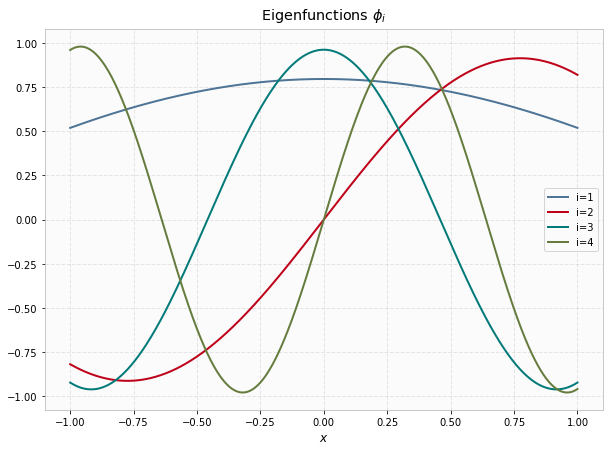

In [10]:
plot_phi(a=1.0)

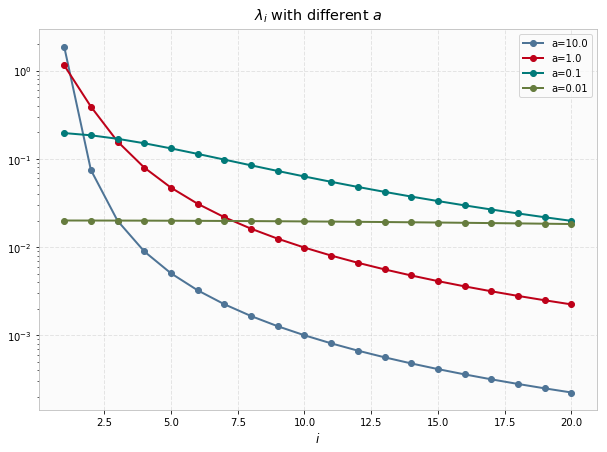

In [11]:
plt.figure(figsize=(10,7))
for a in [10., 1., 0.1, 0.01]:
    lammb = calc_lambda(a)[0]
    plt.plot(range(1, len(lammb)+1), lammb, '-o', label='a={}'.format(a))
    plt.title(r'$\lambda_i$ with different $a$');
    plt.yscale('log')
    plt.xlabel('$i$')
    plt.legend();

It can be seen from the plot that the longer the correlation length, the faster the eigenvalues decrease, and therefore the series converges faster.

Also, we can see that even 
in the case when the general expressions for the eigenfunctions and eigenvalues are known, it is not so easy to calculate them. In this example, we have to solve transcendental equations.

#### Example: Uncorrelated  process

Consider the degenerate case when the correlation length is zero, i.e. $k(x,y)=\delta(x,y)$.
In this case, any orthogonal functions can be the eigenfunctions with constant eigenvalues $\lambda_i=1$.
So, the the series of eigenvalues does not converge and we can not model such a process by KL expansion. 

It is easy to understand why this is so: since the process values at all points are completely independent, we must simulate a continuum of values, and we can do this neither with  a finite nor with a countable number of i.i.d.

#### Example: Fully correlated process

We consider another degenerate case, when $k(x,y)=1$ which means that the correlation length is infinity.
In this trivial case, the process depends only on one random variable. Only one eigenvalue is not zero, and the corresponding eigenfunction is a constant one.


### Expansion Optimal Linear Estimation (EOLE)

As we mentioned before,
in practice we find the eigenvalues and eigenvectors of the matrix constructed on the basis of a function in some finite set of points.

The idea of Expansion Optimal Linear Estimation is based on reduction of the variance of the error of field approximation by the expansion (see the [paper](https://www.researchgate.net/publication/275188753_Optimal_Discretization_of_Random_Fields)).

Consider a matrix $C_{x}$ with elements equal to the correlations of the corresponding points 
$$
c_{ij}=C(x_i,x_j),\qquad C(x,y)=\frac{k(x,y)}{\sigma(x)\sigma(y)},\qquad \sigma(x)=\sqrt{k(x,x)}
$$
for a set of points  $\{x_i\}$, $x_i\in\mathcal X$.
Note, that $C_{x}$ is symmetric positive semi-definite real matrix.
Let  $\{\lambda_i\}$ and $\{\phi_i\}$ are its (non-negative) eigenvalues and eigenvectors, respectively.
We assume, that $\{\lambda_i\}$ are sorted in descending order.
Then, the following approximation $g$ of the field $f$ is considered
$$
g(x,\eta)=\sum_{i=1}^M\frac{\eta_i}{\sqrt{\lambda_i}}\phi_i^T{\bf C}_{x\eta}.
$$
where ${\bf C}_{x\eta}$ is the vector with elements ${\bf C}^{(k)}_{x\eta}=C(x,\eta_k)$.
The i.i.d. random variables $\{\eta_i\}$ are determines by the distribution of $f$, typically they are normal.

The variance of the error of EOLE method is given by
$$
\text{Var}[f(x)-g(x)]=
\sigma^2(x)-\sum_{i=1}^M\frac1{\lambda_i}\left(\phi_i^TC_{x\eta}\right)^2.
$$

Consider an **example** of 2D field on $[-1,\,1]^2$ with the following correlation function
$$
C(x,y)=\exp\left(-\frac{|x-y|^2}{\ell^2}\right)
$$

We can visualize the eigenvectors $\phi_n(x,y)$.

In [12]:
def Gen_uniform_pnts(range_O=[-1, 1], num_1axis=15):
    """
    Returns uniform 2D mesh of points
    """
    pnts_x = np.linspace(range_O[0], range_O[1], num_1axis)
    xv, yv = np.meshgrid(pnts_x, pnts_x)
    pnts = np.vstack((np.ravel(i) for i in [xv, yv])).T
    return pnts


class EOLE(object):
    def __init__(self, corr_func=None, M=10, pnts=None):
        self.corr_func = EOLE.rho if corr_func is None else corr_func
        self.pnts = Gen_uniform_pnts() if pnts is None else pnts
        self.M = M
        self.stored_vals = {}

        Cm = self.Cmat()
        l, theta_r = np.linalg.eig(Cm)
        theta = theta_r.T  # due to strange output of eig
        l = np.real(l)
        idx = np.argsort(l)[::-1]  # The biggest first
        self.l = l[idx]
        self.theta = np.real(theta[idx])

    @jit
    def __call__(self, xi, z=None):
        """
        INPUTS:
        z -- point of field
        xi -- parameters (r.v.)
        Uses:
        pnts -- points in expantion
        l -- lambda, eigenvals
        theta -- eignvectors
        M -- number of terms (truncation)
        """
        if z is None:
            z = xi
            xi = self.xi

        if z.ndim == 1:
            return np.dot(xi[:self.M], self.field_elems(z))
        else:
            res = np.empty(len(z), dtype=float)
            for i, x in enumerate(z):
                res[i] = np.dot(xi[:self.M], self.field_elems(x))
            return res

    @staticmethod
    @jit
    def rho(x, y):
        """
        correlation function
        """
        return np.exp(-(np.linalg.norm(x - y)/0.2)**2)

    @jit
    def C(self, z):
        """
        vector C
        """
        res = np.empty(len(self.pnts), dtype=float)
        for i, p in enumerate(self.pnts):
            res[i] = self.corr_func(z, p)

        return res

    def Cmat(self):
        """
        Matrix from C
        """
        return np.array([self.C(p) for p in self.pnts])

    @jit
    def field_elems(self, z):
        """
        Returns terms separately
        Hash for values used
        You can specify a different xi and reuse this vals
        """
        str_z = str(z)
        if str_z in self.stored_vals:
            return self.stored_vals[str_z]

        C_z = self.C(z)
        vals = np.empty(self.M)
        for i, (l, theta) in enumerate(zip(self.l[:self.M], self.theta[:self.M])):
            vals[i] = np.dot(theta, C_z)/np.sqrt(l)

        self.stored_vals[str_z] = vals

        return vals

In [13]:
M = 11
KL = EOLE(M=M)
Nx = 50
X = Gen_uniform_pnts(range_O=[-1, 1], num_1axis=Nx)
def plot_eigvsls_n(n):
    n -= 1
    xi = np.eye(M)[n]
    KL.xi = xi
    fld = KL(X).reshape(Nx, Nx)
    plt.figure(figsize=(7, 7))
    plt.imshow(fld.reshape(Nx, Nx), extent=(-1,1,-1,1), vmin=-.35, vmax=0.35);
    plt.title(r'$\phi_{}(x,y)$'.format(n))
    plt.colorbar();
    
controls = {r'n' : widgets.IntSlider(min=1,max=M,step=1,value=1, continuous_update=True,description=r'$n$')}


In [14]:
interact(plot_eigvsls_n, **controls);

interactive(children=(IntSlider(value=1, description='$n$', max=11, min=1), Output()), _dom_classes=('widget-interact',))

You can manually mix the the eigenfunctions with the selected weights.
This is exactly what happens when we select the realization of a random vector $\xi=\{\xi_1,\,\xi_2,\,\ldots,\,\xi_n\}$

In [15]:
KL = EOLE(M=4)
Nx = 50
X = Gen_uniform_pnts(range_O=[-1, 1], num_1axis=Nx)


def plot_eigvals(xi1, xi2, xi3, xi4):
    KL.xi = np.array([xi1, xi2, xi3, xi4])
    fld = KL(X).reshape(Nx, Nx)
    plt.figure(figsize=(7, 7))
    plt.imshow(fld.reshape(Nx, Nx), extent=(-1,
                                            1, -1, 1), vmin=-.35, vmax=0.35)
    plt.title('mixture of the first 4 eigenfunctions')
    plt.colorbar()


vals = [1.0, 0.4, -0.6, 0.5]
controls = {r'xi{}'.format(i+1): widgets.FloatSlider(min=-1, max=1, step=0.1,
                                                     value=vals[i], continuous_update=True, description=r'$\xi_{}$'.format(i)) for i in range(4)}

In [16]:
interact(plot_eigvals, **controls);

interactive(children=(FloatSlider(value=1.0, description='$\\xi_0$', max=1.0, min=-1.0), FloatSlider(value=0.4, description='$\\xi_1$', max=1.0, min=-1.0), FloatSlider(value=-0.6, description='$\\xi_2$', max=1.0, min=-1.0), FloatSlider(value=0.5, description='$\\xi_3$', max=1.0, min=-1.0), Output()), _dom_classes=('widget-interact',))

Let us see the dependence of the eigenvalues in the considered 2D case on the correlation length.

In [17]:
def gen_corr_func(sigma):
    @jit
    def rho(x, y):
        """
        correlation function
        """
        return np.exp(-((np.linalg.norm(x - y)/sigma)**2))
    return rho


M = 10

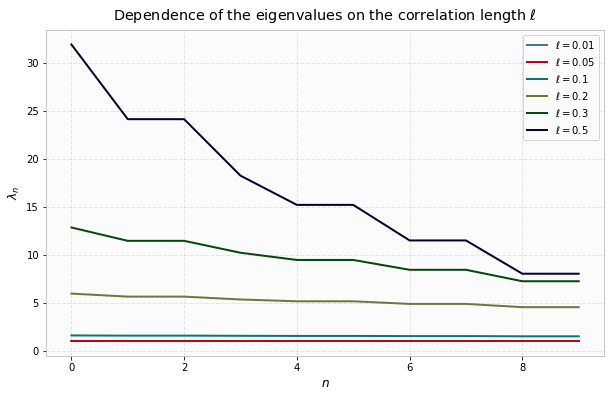

In [18]:
plt.figure(figsize=(10, 6))
for sigma in [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]:
    rho = gen_corr_func(sigma)
    KL = EOLE(corr_func=rho)
    plt.plot(KL.l[:M], label=r'$\ell={}$'.format(sigma))
plt.legend(loc='upper right')
plt.xlabel('$n$')
plt.ylabel('$\lambda_n$');
plt.title(r'Dependence of the eigenvalues on the correlation length $\ell$');
#plt.yscale('log')